In [1]:
import pandas as pd

df = pd.read_csv('final.csv')

,Unnamed: 0.1,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,Unnamed: 0,year,year_month
0,0,United States,2020-01-05,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,NaN,NaN
1,1,United States,2020-01-06,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,NaN,NaN
2,2,United States,2020-01-07,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,NaN,NaN
3,3,United States,2020-01-08,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,NaN,NaN
4,4,United States,2020-01-09,0.0,0.0,0.0,0.0,NaN,NaN,338289856,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24790,24790,China,2024-07-31,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,27816.0,2024.0,2024-07
24791,24791,China,2024-08-01,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,27817.0,2024.0,2024-08
24792,24792,China,2024-08-02,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,27818.0,2024.0,2024-08
24793,24793,China,2024-08-03,99371132.0,0.0,122289.0,0.0,NaN,NaN,1425887360,27819.0,2024.0,2024-08


In [3]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [4]:
df.dropna(inplace=True)

In [5]:
df.rename(columns = {'location':'Country'},inplace=True)

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

In [6]:
# df.drop(columns='date',inplace=True)

In [7]:
df_aus = df[df['Country'] == 'Australia']

In [8]:
df_aus['month_year'] = df['date'].dt.to_period('M')

C:\Users\Pallav\AppData\Local\Temp\ipykernel_10164\2989751405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aus['month_year'] = df['date'].dt.to_period('M')


In [9]:
df_aus

,Country,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,population,year,year_month,month,month_year
1674,Australia,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,26177410,2020.0,2020-01,1,2020-01
1675,Australia,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,26177410,2020.0,2020-01,1,2020-01
1676,Australia,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,26177410,2020.0,2020-01,1,2020-01
1677,Australia,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,26177410,2020.0,2020-01,1,2020-01
1678,Australia,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,26177410,2020.0,2020-01,1,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,Australia,2024-07-31,11861161.0,0.0,25236.0,0.0,0.0,0.0,26177410,2024.0,2024-07,7,2024-07
3344,Australia,2024-08-01,11861161.0,0.0,25236.0,0.0,0.0,0.0,26177410,2024.0,2024-08,8,2024-08
3345,Australia,2024-08-02,11861161.0,0.0,25236.0,0.0,0.0,0.0,26177410,2024.0,2024-08,8,2024-08
3346,Australia,2024-08-03,11861161.0,0.0,25236.0,0.0,0.0,0.0,26177410,2024.0,2024-08,8,2024-08


In [10]:
monthly_df = df_aus.groupby('month_year').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'total_cases': 'max',
    'total_deaths': 'max',
    'people_vaccinated': 'max',
    'people_fully_vaccinated': 'max'
}).reset_index()

In [11]:
monthly_df['year']=monthly_df['month_year'].dt.year

In [12]:
monthly_df['month']=monthly_df['month_year'].dt.month

In [13]:
monthly_df['month_name'] = monthly_df['month_year'].dt.strftime('%b')

In [14]:
demo1 = monthly_df[['month','month_name','year','new_cases']]

In [15]:
# demo1.set_index('month_name',inplace=True)

In [16]:
# demo1.drop(columns='month',inplace=True)

In [15]:
d1 = demo1[demo1['year'] == 2020]
d2 = demo1[demo1['year'] == 2021]
d3 = demo1[demo1['year'] == 2022]
d4 = demo1[demo1['year'] == 2023]
d5 = demo1[demo1['year'] == 2024]

In [16]:
d2

,month,month_name,year,new_cases
12,1,Jan,2021,515.0
13,2,Feb,2021,159.0
14,3,Mar,2021,290.0
15,4,Apr,2021,406.0
16,5,May,2021,432.0
17,6,Jun,2021,737.0
18,7,Jul,2021,2960.0
19,8,Aug,2021,21866.0
20,9,Sep,2021,48489.0
21,10,Oct,2021,69834.0


Text(0.5, 0.98, 'New COVID Cases in Australia in Year 2024')

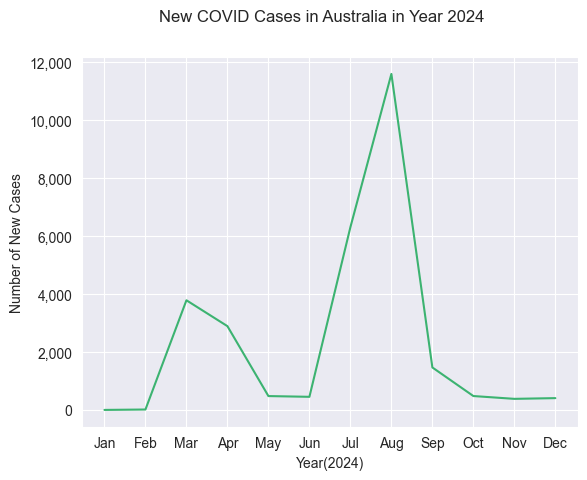

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
sns.set_style('darkgrid')
sns.lineplot(data = d1,x = 'month_name',y = 'new_cases',color = 'mediumseagreen')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y,_ : f'{int(y):,}'))
# plt.ylim(100000,2000000)
plt.xlabel('Year(2024)')
plt.ylabel('Number of New Cases')
plt.suptitle('New COVID Cases in Australia in Year 2024')


**Collecting the plots together**

In [18]:
from matplotlib.ticker import FuncFormatter

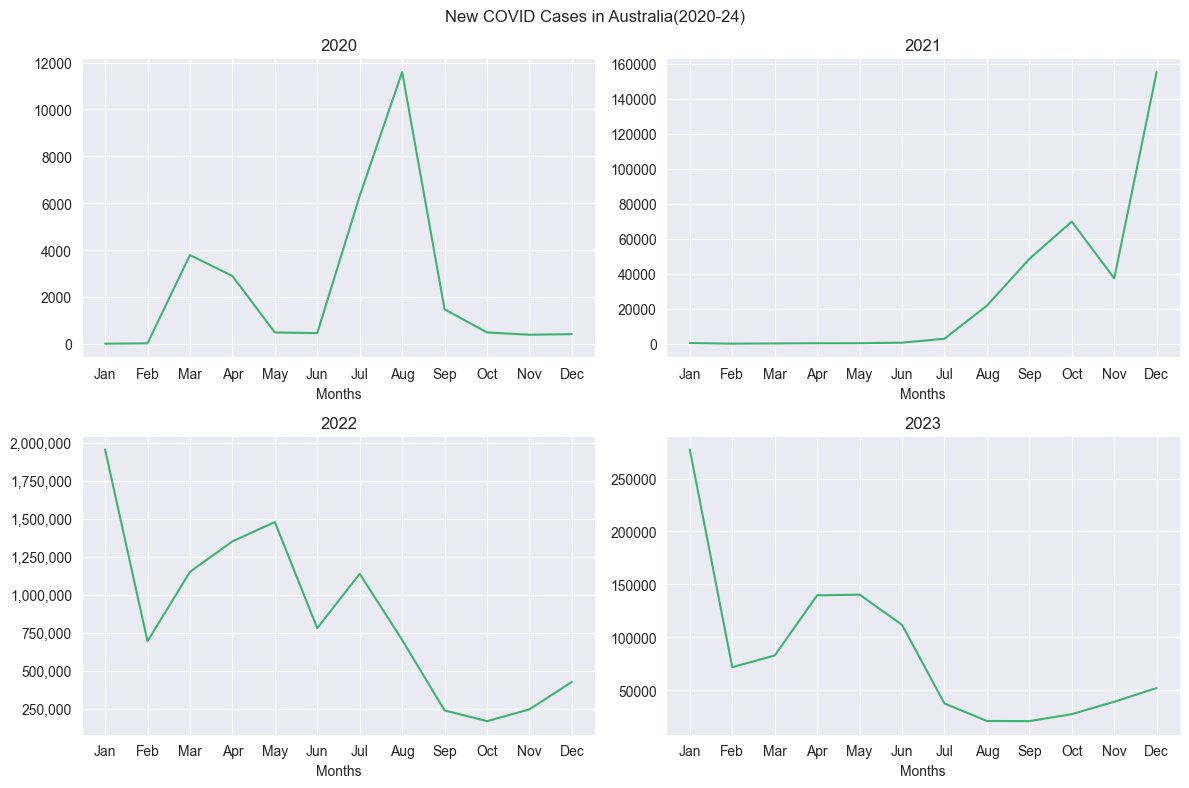

In [19]:
fig,ax = plt.subplots(2,2,figsize = (12,8))
sns.lineplot(data = d1,x = 'month_name',y = 'new_cases',color = 'mediumseagreen',ax = ax[0,0])
ax[0,0].set_xlabel('Months')
ax[0,0].set_ylabel('')
ax[0,0].set_title('2020')

# ***************************************************************************************

sns.lineplot(data = d2,x = 'month_name',y = 'new_cases',color = 'mediumseagreen',ax = ax[0,1])
ax[0,1].set_xlabel('Months')
ax[0,1].set_ylabel('')
ax[0,1].set_title('2021')

# ****************************************************************************************

sns.lineplot(data = d3,x = 'month_name',y = 'new_cases',color = 'mediumseagreen',ax = ax[1,0])
ax[1,0].set_xlabel('Months')
ax[1,0].set_ylabel('')
ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{int(x):,}'))
ax[1,0].set_title('2022')

# ****************************************************************************************
sns.lineplot(data = d4,x = 'month_name',y = 'new_cases',color = 'mediumseagreen',ax = ax[1,1])
ax[1,1].set_xlabel('Months')
ax[1,1].set_ylabel('')
ax[1,1].set_title('2023')

plt.suptitle('New COVID Cases in Australia(2020-24)')
fig.tight_layout()